In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from typing import Tuple



In [60]:
sns.set_theme(style='whitegrid')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Leitura e pré-processamento de dados.

In [61]:
df = pd.read_csv('data/Florida NREL 2023.csv', skiprows=2)
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Alpha,Aerosol Optical Depth,Asymmetry,Clearsky DHI,...,GHI,Ozone,Relative Humidity,Solar Zenith Angle,SSA,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2020,1,1,0,30,12.8,1.43,0.052,0.65,0,...,0,0.249,78.01,113.56,0.92,0.16,1015,1.8,294,1.3
1,2020,1,1,1,30,11.9,1.44,0.048,0.65,0,...,0,0.250,79.01,126.47,0.92,0.16,1015,1.8,294,1.4
2,2020,1,1,2,30,11.3,1.44,0.045,0.65,0,...,0,0.252,79.58,139.58,0.91,0.16,1015,1.8,296,1.4
3,2020,1,1,3,30,10.8,1.43,0.045,0.65,0,...,0,0.252,80.53,152.75,0.92,0.16,1015,1.9,299,1.4
4,2020,1,1,4,30,10.6,1.42,0.046,0.65,0,...,0,0.252,80.77,165.68,0.92,0.16,1015,2.1,302,1.5
5,2020,1,1,5,30,10.6,1.40,0.052,0.65,0,...,0,0.252,80.46,174.60,0.93,0.16,1015,2.2,308,1.6
6,2020,1,1,6,30,10.4,1.41,0.057,0.65,0,...,0,0.252,82.58,165.26,0.93,0.16,1015,2.2,315,1.6
7,2020,1,1,7,30,9.9,1.44,0.055,0.65,0,...,0,0.251,83.70,152.31,0.93,0.16,1014,2.0,323,1.4
8,2020,1,1,8,30,9.4,1.45,0.051,0.65,0,...,0,0.252,85.26,139.13,0.93,0.16,1014,1.9,328,1.4
9,2020,1,1,9,30,9.1,1.45,0.048,0.65,0,...,0,0.252,85.85,126.02,0.92,0.16,1014,1.9,331,1.4


In [62]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Alpha,Aerosol Optical Depth,Asymmetry,Clearsky DHI,...,GHI,Ozone,Relative Humidity,Solar Zenith Angle,SSA,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018.528767,6.526027,15.720548,11.500000,30.0,22.692717,1.102733,0.135265,0.632521,51.734132,...,208.807648,0.281050,78.668935,89.730865,0.951562,0.163507,1014.182763,3.341918,163.444292,2.195936
std,3.162002,3.448048,8.796749,6.922582,0.0,6.079356,0.331841,0.079028,0.010915,61.105112,...,290.457856,0.020168,18.847688,41.624641,0.021697,0.009113,4.064898,1.435814,97.836396,1.263986
min,2014.000000,1.000000,1.000000,0.000000,30.0,-0.600000,0.140000,0.021000,0.620000,0.000000,...,0.000000,0.217000,19.010000,5.030000,0.870000,0.140000,1002.000000,0.400000,0.000000,0.200000
25%,2016.000000,4.000000,8.000000,5.750000,30.0,19.000000,0.880000,0.083000,0.620000,0.000000,...,0.000000,0.268000,64.670000,54.382500,0.940000,0.160000,1012.000000,2.200000,83.000000,1.200000
50%,2020.000000,7.000000,16.000000,11.500000,30.0,23.800000,1.170000,0.118000,0.630000,6.000000,...,5.000000,0.281000,82.805000,89.840000,0.960000,0.160000,1014.000000,3.300000,149.000000,1.900000
75%,2021.000000,10.000000,23.000000,17.250000,30.0,27.100000,1.350000,0.166000,0.640000,102.000000,...,399.250000,0.293000,96.122500,125.402500,0.970000,0.170000,1016.000000,4.600000,242.000000,3.000000
max,2023.000000,12.000000,31.000000,23.000000,30.0,35.500000,1.880000,0.736000,0.650000,331.000000,...,1076.000000,0.343000,100.000000,174.850000,0.990000,0.180000,1029.000000,6.900000,360.000000,7.400000


In [63]:
df['Year'].unique()

array([2020, 2014, 2021, 2022, 2017, 2023, 2016])

O banco de dados contém informações para os anos de 2014, 2016, 2017, 2020, 2021, 2022, 2023.

In [64]:
def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(['Minute','Cloud Type', 'Ozone','Solar Zenith Angle', 'Surface Albedo',
                    'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'DHI', 'DNI', 'Fill Flag', 'Cloud Fill Flag', 'Aerosol Optical Depth','Alpha','SSA','Asymmetry'], axis = 1)
    df = df.dropna()
    # Combine year, month, day, hour into a single datetime column
    df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
    # Extract useful time-based features
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['HourOfDay'] = df['Datetime'].dt.hour
    df['Month'] = df['Datetime'].dt.month
    # Optionally, drop original columns if not needed
    df = df.drop(['Month', 'Day', 'Hour', 'Datetime'], axis=1)
    return df

In [65]:
def data_scaling_split(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    scaler = MinMaxScaler()
    columns_to_scale = [col for col in df.columns if col not in ['Year', 'DayOfYear', 'HourOfDay']]
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    # Uso dos dados até 2021 para treino, 2022 para validação e 2023 para teste.
    df_train = df[df['Year'] <= 2021]
    df_val = df[df['Year'] == 2022]
    df_test = df[df['Year'] == 2023]
    #Remove a coluna 'Year' dos dataframes.
    df_train = df_train.drop(['Year'], axis=1)
    df_val = df_val.drop(['Year'], axis=1)
    df_test = df_test.drop(['Year'], axis=1)
    # Reset index for both dataframes
    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)
    return df_train, df_val, df_test

In [66]:
df = data_preprocessing(df)
df.tail(10)

,Year,Temperature,Dew Point,GHI,Relative Humidity,Pressure,Precipitable Water,Wind Direction,Wind Speed,DayOfYear,HourOfDay
8750,2016,16.7,6.3,385,50.32,1021,1.4,108,2.7,366,14
8751,2016,20.3,8.7,535,47.38,1020,1.6,131,3.7,366,15
8752,2016,22.2,9.6,631,44.78,1019,1.7,141,3.6,366,16
8753,2016,23.3,9.9,660,42.76,1018,1.9,147,3.3,366,17
8754,2016,23.8,9.9,622,41.37,1017,2.0,151,3.2,366,18
8755,2016,23.8,9.8,521,41.00,1016,2.1,152,3.2,366,19
8756,2016,23.2,9.8,367,42.57,1016,2.2,151,2.8,366,20
8757,2016,20.6,10.4,179,52.12,1016,2.2,145,1.9,366,21
8758,2016,17.9,10.8,10,63.11,1017,2.2,138,1.3,366,22
8759,2016,16.8,11.1,0,69.18,1017,2.2,136,1.2,366,23


In [67]:
np.random.seed(42)  # For reproducibility
random_day = np.random.randint(1, 366)
df_random_day = df[df['DayOfYear'] == random_day]
df_random_day = df_random_day.drop(['DayOfYear'], axis=1)
year_of_day = df_random_day["Year"].iloc[0]

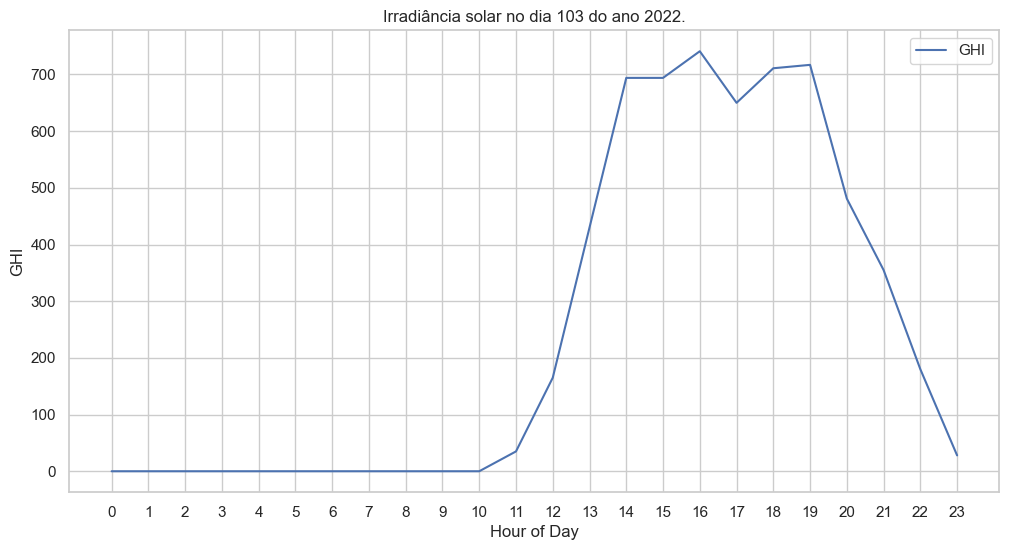

In [68]:
df_random_day.plot(
	x='HourOfDay',
	y='GHI',
	figsize=(12, 6),
	title=f'Irradiância solar no dia {random_day} do ano {year_of_day}.'
)
plt.xlabel('Hour of Day')
plt.ylabel('GHI')
plt.xticks(df_random_day['HourOfDay'])
plt.show()

In [69]:
df_train, df_val, df_test = data_scaling_split(df)


In [70]:
df_test

,Temperature,Dew Point,GHI,Relative Humidity,Pressure,Precipitable Water,Wind Direction,Wind Speed,DayOfYear,HourOfDay
6552,0.731302,0.946176,0.000000,0.998765,0.370370,0.830769,0.147222,0.361111,274,0
6553,0.725762,0.940510,0.000000,1.000000,0.370370,0.815385,0.150000,0.333333,274,1
6554,0.720222,0.934844,0.000000,1.000000,0.370370,0.800000,0.152778,0.305556,274,2
6555,0.717452,0.932011,0.000000,1.000000,0.370370,0.800000,0.152778,0.277778,274,3
6556,0.714681,0.929178,0.000000,1.000000,0.370370,0.800000,0.152778,0.263889,274,4
...,...,...,...,...,...,...,...,...,...,...
7291,0.853186,0.674221,0.534387,0.295345,0.111111,0.400000,0.019444,0.347222,304,19
7292,0.833795,0.660057,0.371747,0.298061,0.111111,0.400000,0.030556,0.333333,304,20
7293,0.783934,0.662890,0.184015,0.363749,0.148148,0.384615,0.058333,0.250000,304,21
7294,0.709141,0.696884,0.018587,0.522534,0.148148,0.369231,0.097222,0.180556,304,22


# Definição dos modelos.

In [71]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout=0.2, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers=num_layers,
            batch_first=True, 
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Camadas de regularização
        self.dropout1 = nn.Dropout(dropout)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.dropout2 = nn.Dropout(dropout * 0.5)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)
        
        # Inicialização dos pesos
        self.init_weights()
        
    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        
    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        lstm_out, _ = self.lstm(x)
        
        # Pega apenas a última saída da sequência
        out = lstm_out[:, -1, :]
        
        # Regularização e camadas densas
        out = self.dropout1(out)
        out = self.batch_norm(out)
        out = torch.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        
        return out

In [72]:
#Modelo GRU
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout=0.2, num_layers=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(
            input_size, 
            hidden_size, 
            num_layers=num_layers,
            batch_first=True, 
            dropout=dropout if num_layers > 1 else 0
        )
        
        # Camadas de regularização
        self.dropout1 = nn.Dropout(dropout)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)
        self.dropout2 = nn.Dropout(dropout * 0.5)
        self.fc2 = nn.Linear(hidden_size // 2, output_size)
        
        # Inicialização dos pesos
        self.init_weights()
        
    def init_weights(self):
        for name, param in self.gru.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        
    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        gru_out, _ = self.gru(x)
        
        # Pega apenas a última saída da sequência
        out = gru_out[:, -1, :]
        
        # Regularização e camadas densas
        out = self.dropout1(out)
        out = self.batch_norm(out)
        out = torch.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        
        return out

In [73]:
def train_model(model, train_loader, val_loader, test_loader, epochs, lr, patience=15, weight_decay=1e-5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    """Treina o modelo com early stopping e regularização"""
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=7, factor=0.5)
    
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []
    test_losses = []
    best_model_state = None
    
    for epoch in range(epochs):
        # Treino
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze(-1)  # Ajusta a saída para [batch_size]
            loss = criterion(outputs.squeeze(), y_batch)
            loss.backward()
            
            # Gradient clipping para evitar exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item()
        
        # Validação
        model.eval()
        val_loss = 0
        test_loss = 0
        
        with torch.no_grad():
            # Loss de validação
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                val_loss += criterion(outputs.squeeze(), y_batch).item()
            
            # Loss de teste
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                test_loss += criterion(outputs.squeeze(), y_batch).item()
        
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        test_loss /= len(test_loader)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        test_losses.append(test_loss)
        
        scheduler.step(val_loss)
        
        # Early stopping baseado na validação
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # Salva o melhor modelo
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping na época {epoch+1}")
                break
        
        # Print do progresso a cada 20 épocas
        if (epoch + 1) % 20 == 0:
            print(f'Época {epoch+1}/{epochs}: Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}, Test Loss: {test_loss:.6f}')
    
    # Carrega o melhor modelo
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return train_losses, val_losses, test_losses, best_val_loss

In [74]:
def plot_losses(train_losses, val_losses, test_losses):
    """Plota as perdas de treino, validação e teste"""
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Train Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.plot(test_losses, label='Test Loss', color='green')
    plt.title('Losses durante o treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [75]:
#Convertendo os dados de treino, validação e teste para tensores PyTorch
ghi_values_train = torch.tensor(df_train['GHI'].values, dtype=torch.float32).unsqueeze(-1)
ghi_values_val = torch.tensor(df_val['GHI'].values, dtype=torch.float32).unsqueeze(-1)
ghi_values_test = torch.tensor(df_test['GHI'].values, dtype=torch.float32).unsqueeze(-1)

X_train = ghi_values_train[:-1].unsqueeze(1)  # shape: (N-1, 1, 1)
y_train = ghi_values_train[1:].squeeze(-1)          # shape: (N-1, 1)
X_val = ghi_values_val[:-1].unsqueeze(1)  # shape: (N-1, 1, 1)
y_val = ghi_values_val[1:].squeeze(-1)          # shape: (N-1, 1)
X_test = ghi_values_test[:-1].unsqueeze(1)  # shape: (N-1, 1, 1)
y_test = ghi_values_test[1:].squeeze(-1)          # shape: (N-1, 1)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = GRUModel(input_size=X_train.shape[2], hidden_size=2, output_size=1).to(device)

train_losses, val_losses, test_losses, best_val_loss = train_model(
    model, train_loader, val_loader, test_loader, 
    epochs=200, lr=0.001, weight_decay=1e-5
)


Época 20/200: Train Loss: 0.034398, Val Loss: 0.060036, Test Loss: 0.040451
Época 40/200: Train Loss: 0.036750, Val Loss: 0.050189, Test Loss: 0.033063
Época 60/200: Train Loss: 0.036346, Val Loss: 0.050842, Test Loss: 0.033578
Early stopping na época 64



--- Análise de Overfitting ---


Text(0, 0.5, 'Loss')

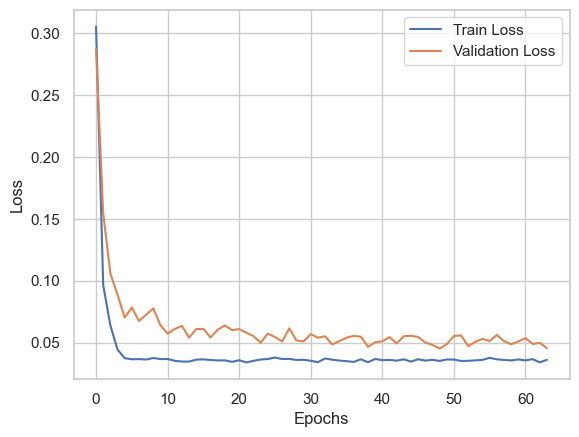

In [76]:
print("\n--- Análise de Overfitting ---")
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
final_test_loss = test_losses[-1]
sns.lineplot(x=range(len(train_losses)), y=train_losses, label='Train Loss')
sns.lineplot(x=range(len(val_losses)), y=val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
